## Лабораторная работа 2

Для удобства берем другой датасет: **iris**

В датасете содержатся следующие атрибуты: 

-длина чашелистика 

-ширина чашелистика 

-длина лепестка 

-ширины лепестка

-класс 

In [17]:
#Загржаем данные из датасета 
import pandas as pd

iris = pd.read_csv('iris_csv.csv')
iris.head(7)

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa


Добавим еще один атрибут - номинальную площадь чашелистика ()

In [32]:
print(iris.columns)

# Добавление нового атрибута
iris['petal_area'] = iris['petallength'] * iris['petalwidth']

display(iris)


Index(['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'class',
       'petal_area'],
      dtype='object')


,sepallength,sepalwidth,petallength,petalwidth,class,petal_area
0,5.1,3.5,1.4,0.2,Iris-setosa,0.28
1,4.9,3.0,1.4,0.2,Iris-setosa,0.28
2,4.7,3.2,1.3,0.2,Iris-setosa,0.26
3,4.6,3.1,1.5,0.2,Iris-setosa,0.30
4,5.0,3.6,1.4,0.2,Iris-setosa,0.28
...,...,...,...,...,...,...
138,6.7,3.0,5.2,2.3,Iris-virginica,11.96
139,6.3,2.5,5.0,1.9,Iris-virginica,9.50
140,6.5,3.0,5.2,2.0,Iris-virginica,10.40
141,6.2,3.4,5.4,2.3,Iris-virginica,12.42


In [27]:
#Проверка на наличие пропущенных значений.

iris.isna().sum()

sepallength    0
sepalwidth     0
petallength    0
petalwidth     0
class          0
petal_area     0
dtype: int64

Видим, что пропущенных значений в выборке нет.


Выбросы в sepallength
Выбросы в sepalwidth
Выбросы в petallength
Выбросы в petalwidth
Выбросы в petal_area


,sepallength,sepalwidth,petallength,petalwidth,class,petal_area
0,5.1,3.5,1.4,0.2,Iris-setosa,0.28
1,4.9,3.0,1.4,0.2,Iris-setosa,0.28
2,4.7,3.2,1.3,0.2,Iris-setosa,0.26
3,4.6,3.1,1.5,0.2,Iris-setosa,0.30
4,5.0,3.6,1.4,0.2,Iris-setosa,0.28
...,...,...,...,...,...,...
141,6.7,3.0,5.2,2.3,Iris-virginica,11.96
142,6.3,2.5,5.0,1.9,Iris-virginica,9.50
143,6.5,3.0,5.2,2.0,Iris-virginica,10.40
144,6.2,3.4,5.4,2.3,Iris-virginica,12.42


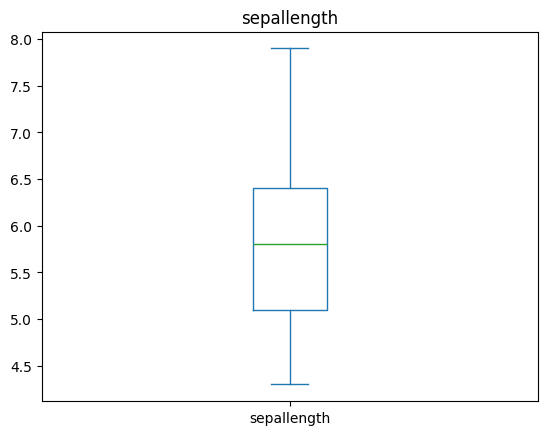

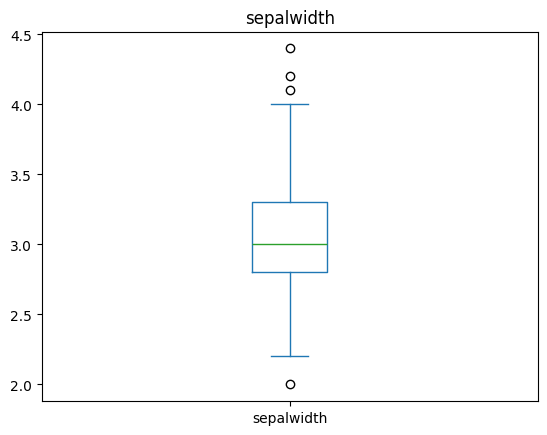

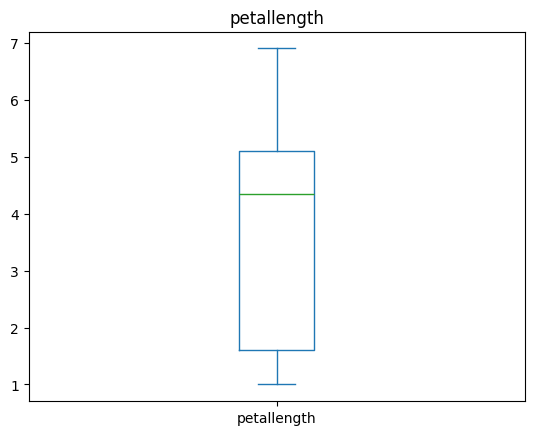

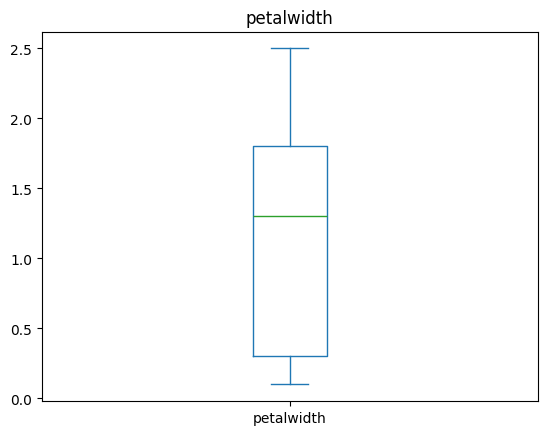

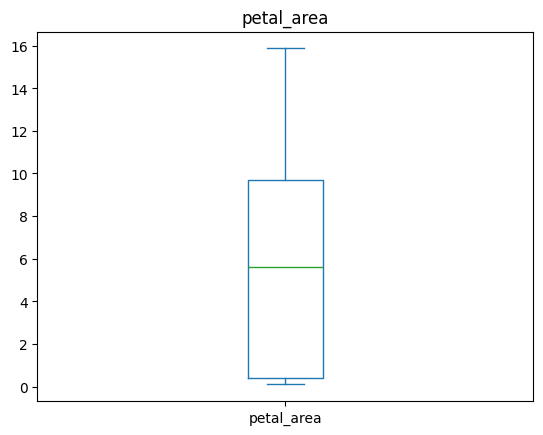

In [30]:
# Список столбцов для анализа
researchColumns = ['sepallength', 'sepalwidth', 'petallength', 'petalwidth',
       'petal_area']
import matplotlib.pyplot as plt

indexes_to_drop = []
for col in researchColumns:
   plt.figure()
   plt.title(col)
   
   _, bp = iris[col].plot.box(return_type='both')
   outliers = [flier.get_ydata() for flier in bp["fliers"]][0]
   print("Выбросы в", col)
   
   for index, elem in enumerate(iris[col]):
       if elem in outliers:
           indexes_to_drop.append(index)
      
iris.drop(indexes_to_drop, inplace=True)
iris.reset_index(drop=True, inplace=True)
display(iris)

## Удаление дубликатов


In [31]:
# Удаление дубликатов
iris.drop_duplicates(inplace=True)

# Сброс индекса
iris.reset_index(drop=True, inplace=True)

# Отображение обновленного DataFrame
display(iris)

,sepallength,sepalwidth,petallength,petalwidth,class,petal_area
0,5.1,3.5,1.4,0.2,Iris-setosa,0.28
1,4.9,3.0,1.4,0.2,Iris-setosa,0.28
2,4.7,3.2,1.3,0.2,Iris-setosa,0.26
3,4.6,3.1,1.5,0.2,Iris-setosa,0.30
4,5.0,3.6,1.4,0.2,Iris-setosa,0.28
...,...,...,...,...,...,...
138,6.7,3.0,5.2,2.3,Iris-virginica,11.96
139,6.3,2.5,5.0,1.9,Iris-virginica,9.50
140,6.5,3.0,5.2,2.0,Iris-virginica,10.40
141,6.2,3.4,5.4,2.3,Iris-virginica,12.42


## Графики зависимостей одних величин от других


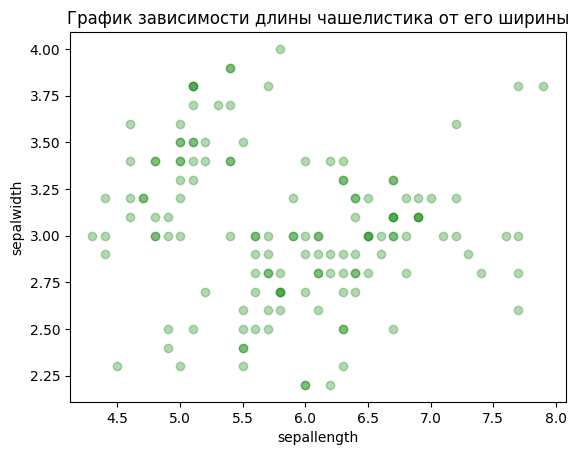

In [36]:
plt.scatter(iris['sepallength'], iris['sepalwidth'], color='green', alpha=0.3)
plt.xlabel("sepallength")
plt.ylabel("sepalwidth")
plt.title("График зависимости длины чашелистика от его ширины")
plt.show()

При визуальном анализе четкой зависимости не обнаружено. Логически можем догадаться, что ярковыраженная зависимость будет наблюдаться между шириной лепестка и его площадью. 

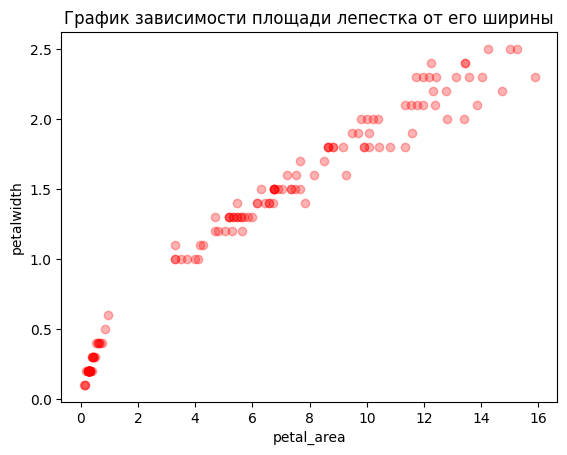

In [39]:
plt.scatter(iris['petal_area'], iris['petalwidth'], color='red', alpha=0.3)
plt.xlabel("petal_area")
plt.ylabel("petalwidth")
plt.title("График зависимости площади лепестка от его ширины")

plt.show()

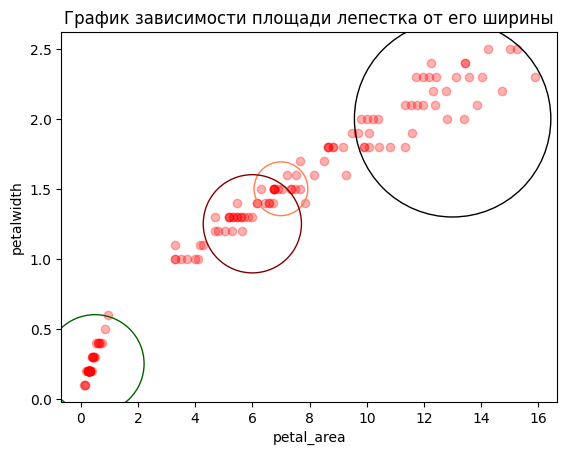

In [61]:
plt.scatter(iris['petal_area'], iris['petalwidth'], color='red', alpha=0.3)
plt.xlabel("petal_area")
plt.ylabel("petalwidth")
plt.title("График зависимости площади лепестка от его ширины")

plt.scatter( 7 , 1.5, s = 1500, facecolors='none', edgecolors='coral' ) 
plt.scatter( 0.5 , 0.25, s = 5000, facecolors='none', edgecolors='darkgreen' ) 
plt.scatter( 6 , 1.25 , s = 5000, facecolors='none', edgecolors='maroon' ) 
plt.scatter( 13 , 2 , s = 20000, facecolors='none', edgecolors='black' ) 
plt.show()
#на графике отображены кластеры, выделенные мной при визуальном анализе.

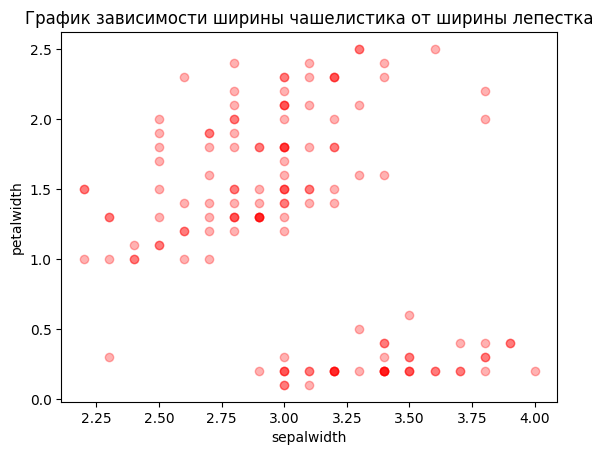

In [38]:
plt.scatter(iris['sepalwidth'], iris['petalwidth'], color='red', alpha=0.3)
plt.xlabel("sepalwidth")
plt.ylabel("petalwidth")
plt.title("График зависимости ширины чашелистика от ширины лепестка")

plt.show()

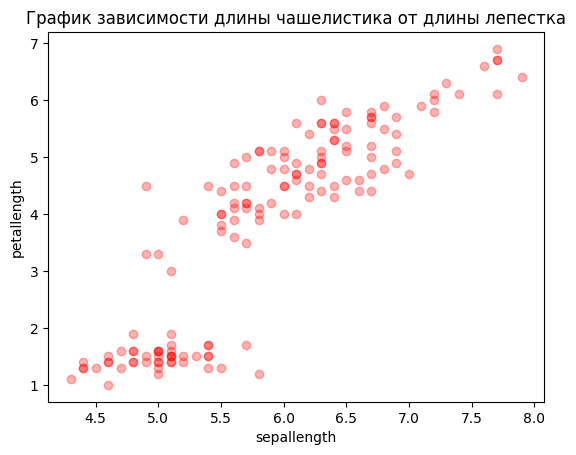

In [40]:
plt.scatter(iris['sepallength'], iris['petallength'], color='red', alpha=0.3)
plt.xlabel("sepallength")
plt.ylabel("petallength")
plt.title("График зависимости длины чашелистика от длины лепестка")

plt.show()

В этом примере зависимость отображена наиболее ярко, поэтому для кластерного анализа я возьму его и график зависимости площади лепестка от его ширины.

Ниже, на графике, отображены кластеры, выделенные мной при визуальном анализе.

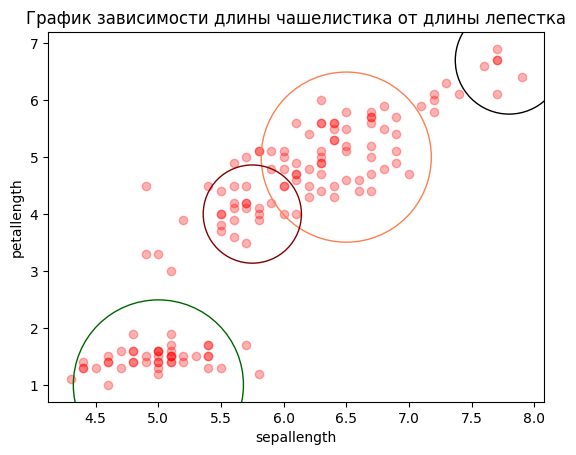

In [68]:
plt.scatter(iris['sepallength'], iris['petallength'], color='red', alpha=0.3)
plt.xlabel("sepallength")
plt.ylabel("petallength")
plt.title("График зависимости длины чашелистика от длины лепестка")

plt.scatter( 6.5 , 5, s = 15000, facecolors='none', edgecolors='coral' ) 
plt.scatter( 5 , 1, s = 15000, facecolors='none', edgecolors='darkgreen' ) 
plt.scatter( 5.75 , 4 , s = 5000, facecolors='none', edgecolors='maroon' ) 
plt.scatter( 7.8 , 6.7 , s = 6000, facecolors='none', edgecolors='black' )
plt.show()

## Метод k-means


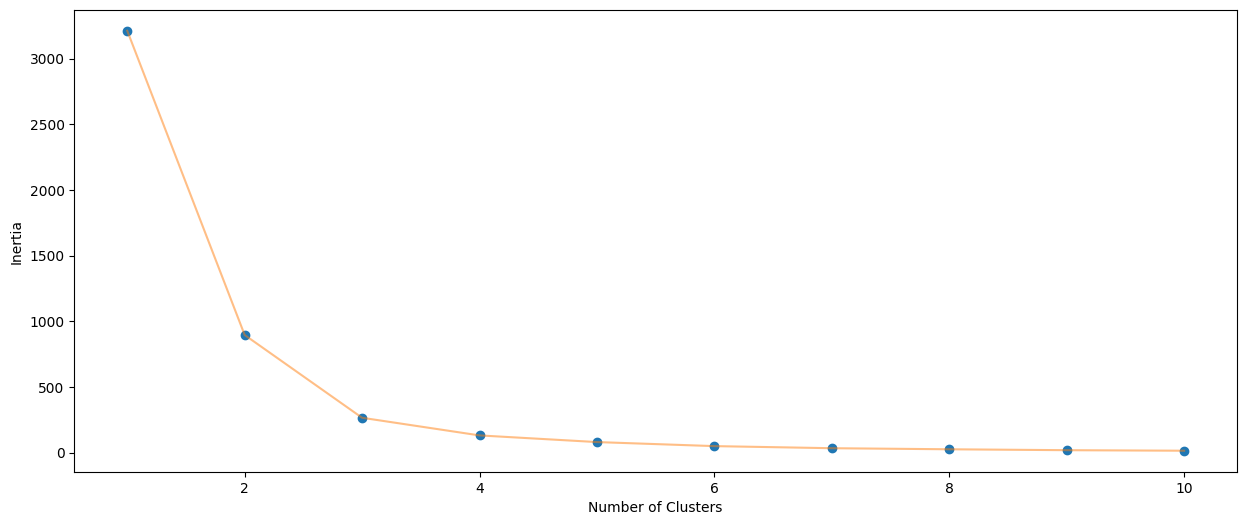

In [54]:
import numpy as np
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
X1 = iris[['petal_area' , 'petalwidth']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)
    
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

Был использован подход, называемый «метод локтя», чтобы найти наилучшее значение N. Для этого был построен график зависимости инерции от количества кластеров, или N. Можно заметить, что до N=4 наблюдается быстрое уменьшение отклонения, но потом отклонение перестает падать также быстро. Значит это и есть подходящее значение, такое, что общее отклонение внутри каждого кластера становится достаточно мало.


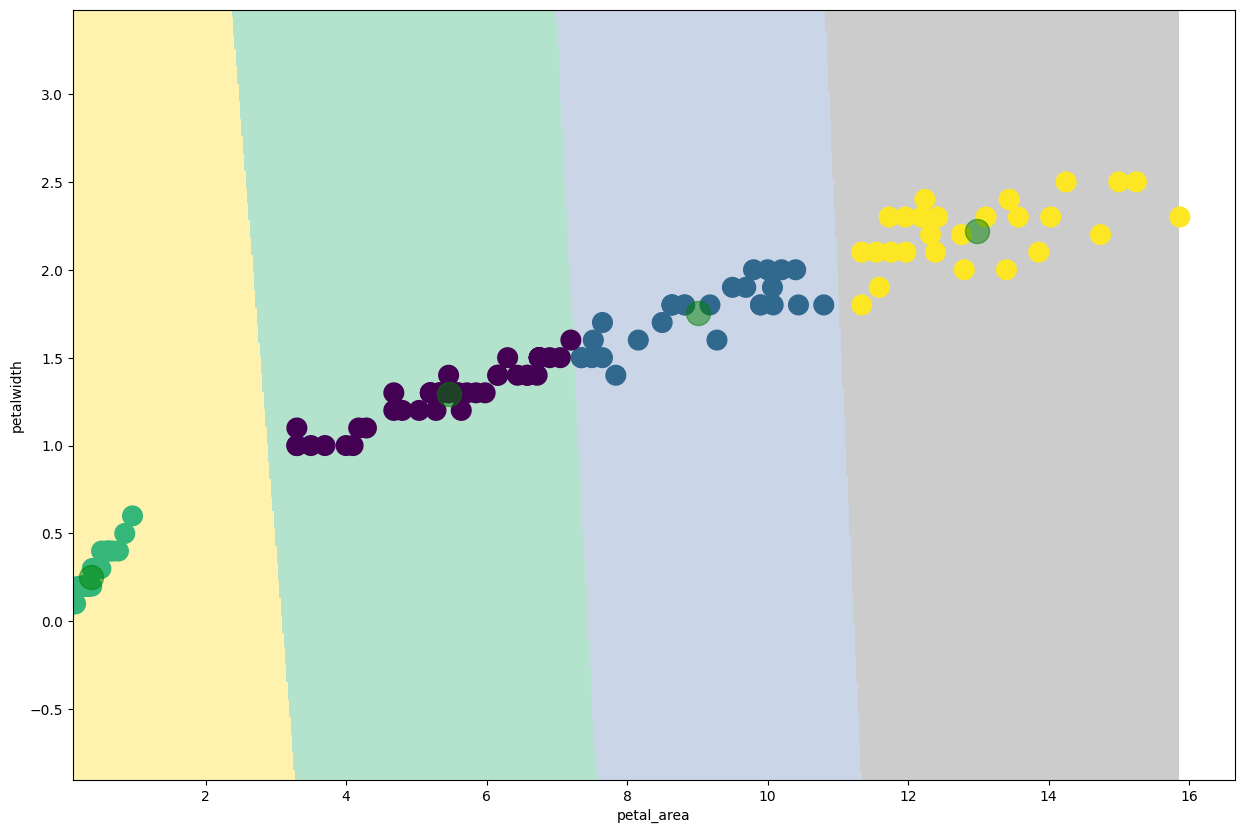

In [57]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_


h = 0.02
x_min, x_max = X1[:, 0].min(), X1[:, 0].max()
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

plt.figure(1, figsize=(15, 10))
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation='nearest', 
          extent=(xx.min(), xx.max(), yy.min(), yy.max()),
          cmap=plt.cm.Pastel2, aspect='auto', origin='lower')

plt.scatter(x='petal_area', y='petalwidth', data=iris, c=labels1, s=200)
plt.scatter(x=centroids1[:, 0], y=centroids1[:, 1], s=300, c='green', alpha=0.5) #итоговые центры кластеров помечены зеленым
plt.ylabel('petalwidth')
plt.xlabel('petal_area')
plt.show()


**Промежуточный вывод:** Сравнивая этот результат с первым графиком, видим, что количество центров кластеризации было указано верно, однако их расположение изначально было отмечено очень не точно.


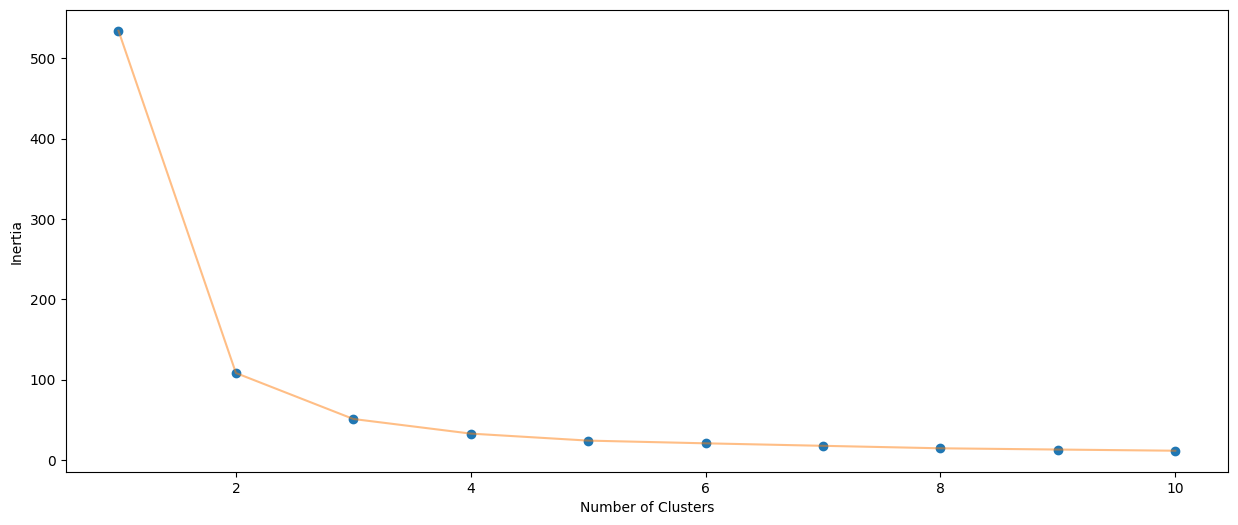

In [62]:
import numpy as np
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
X1 = iris[['sepallength' , 'petallength']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)
    
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

Возьмем n = 4

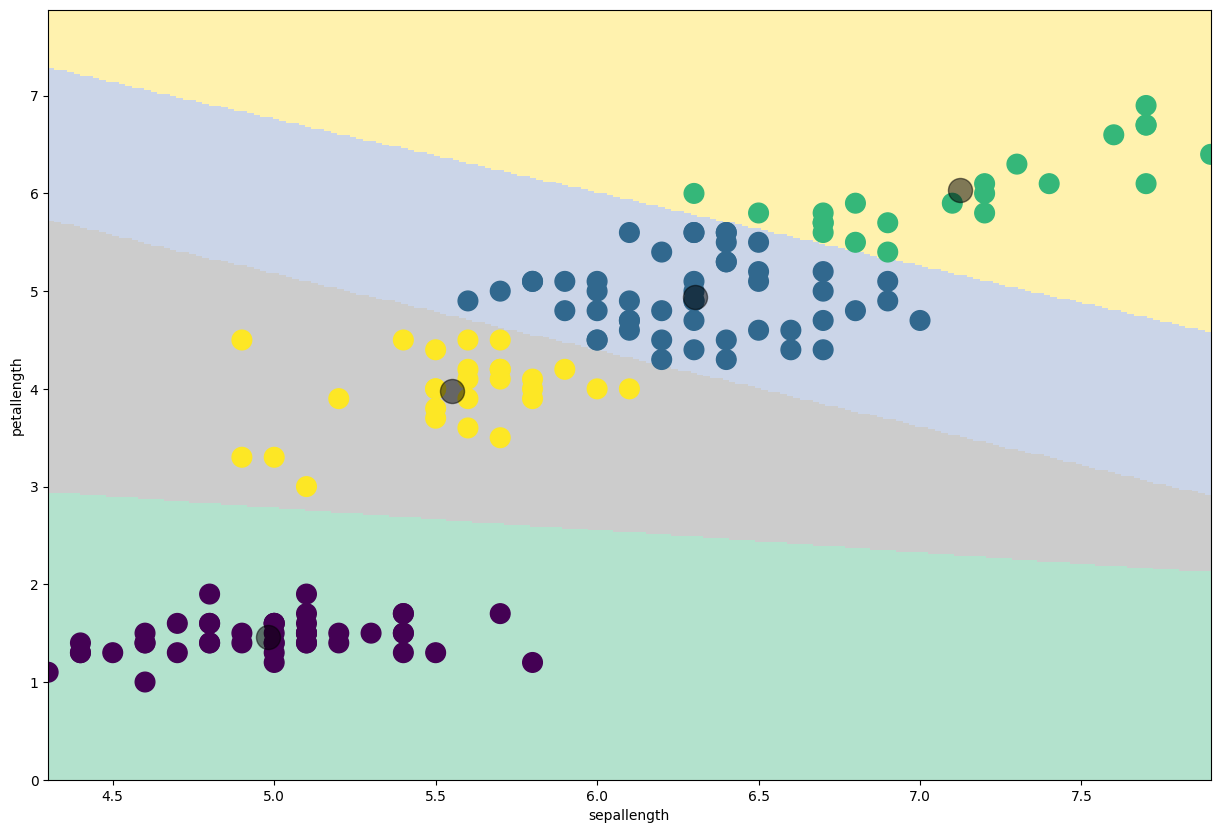

In [66]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_


h = 0.02
x_min, x_max = X1[:, 0].min(), X1[:, 0].max()
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

plt.figure(1, figsize=(15, 10))
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation='nearest', 
          extent=(xx.min(), xx.max(), yy.min(), yy.max()),
          cmap=plt.cm.Pastel2, aspect='auto', origin='lower')

plt.scatter(x='sepallength', y='petallength', data=iris, c=labels1, s=200)
plt.scatter(x=centroids1[:, 0], y=centroids1[:, 1], s=300, c='black', alpha=0.5) #итоговые центры кластеров помечены чёрными
plt.ylabel('petallength')
plt.xlabel('sepallength')
plt.show()

**Промежуточный вывод** : предположение, выдвинутое в первой половине работе относительно количества кластеров, оказалось верным, однако снова из центры были выставлены несколько неточно.

## Вывод: 


**Определение оптимального числа кластеров**: В этом проекте мы использовали метод k-means для кластеризации данных ириса. Для определения оптимального числа кластеров мы провели эксперимент, где обучали модель k-means для каждого числа кластеров от 1 до 10 и сравнивали сумму квадратов расстояний до центроидов кластеров (инерцию) для каждого случая. Оптимальное число кластеров определялось как то, которое минимизирует инерцию.

**Визуализация результатов кластеризации**: После обучения модели k-means с оптимальным числом кластеров мы визуализировали результаты кластеризации. Мы создали сетку точек и использовали метод predict модели k-means для определения кластера для каждой точки на сетке. Затем мы визуализировали кластеры и центроиды на графике.

**Применение метода k-means**: Метод k-means - это один из самых популярных методов кластеризации, и он широко используется в различных областях, включая биологию, медицину, маркетинг и многие другие. В этом проекте мы использовали метод k-means для кластеризации данных ириса, что демонстрирует его применимость в области машинного обучения.
В целом, этот проект показывает, как можно использовать метод k-means для кластеризации данных и визуализации результатов кластеризации. Это может быть полезно для анализа данных и выявления скрытых структур в данных 